# Hands-On Research #2

# Color Features

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils.color_histograms_utils import *

%matplotlib inline

/Users/colinwei/virtualenvs/python3/ai4all2018/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Implementing Color Histograms

Now it's time to put our knowledge of image representations to the test by implementing a **feature extraction** technique. Feature extraction lets us take a large image and express it in terms of a much smaller array that summarizes everything important about the image.

In our case, we want to summarize the colors in an image using **Color Histograms**. For example, if we know the types of colors that appear in a **Satellite Image**, it may be easy to tell different areas apart (Forests will have more green, deserts will have more brown).

In order to implement color histograms, you will need to use **slicing**, **concatenation**, and a new command called **np.histogram()**.

**Hint**: The documentation for np.histogram can be viewed at [this link](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.histogram.html). You can call np.histogram(img_channel, bins, range=(0, 1))


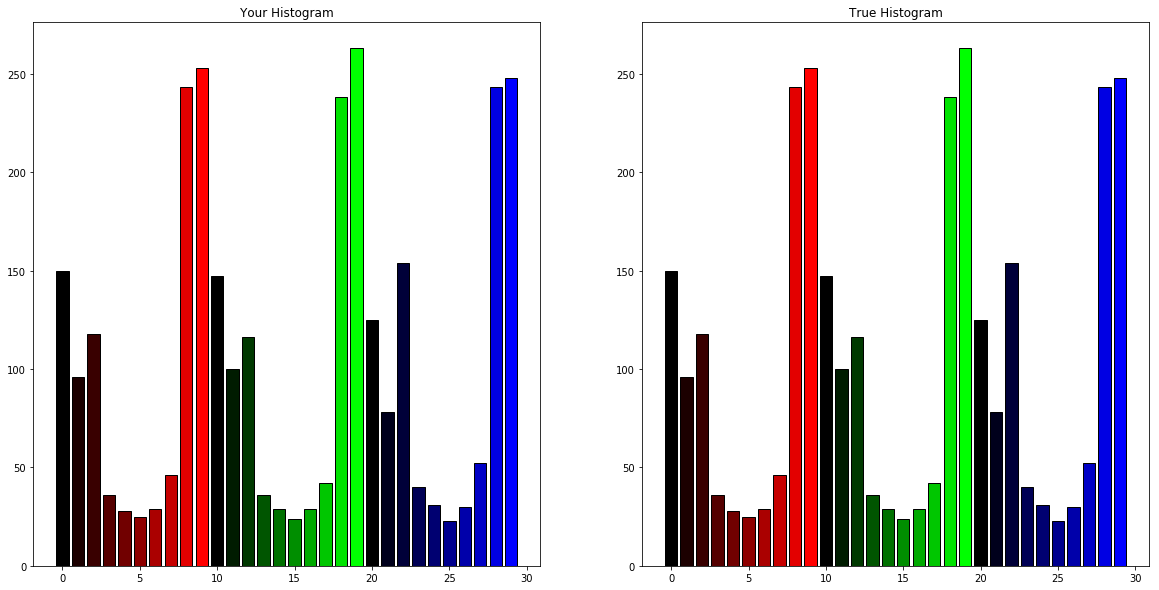

Your histogram looks perfect!


In [10]:
def image_to_histogram(x, bins, use_hsv):
    """
    Inputs:
    x - a single image.
    bins - the number of bins your histograms should have for each channel
    use_hsv - determines if images are stored in RGB or HSV format.
    
    Returns:
    h - a single histogram. It's shape should be (3 x bins,)
    """
    if use_hsv: # convert an RGB to an HSV function
        x = rgb_to_hsv(x)
    h = np.zeros((3*bins,))
    ## YOUR CODE HERE
    x0 = x[:, :, 0]
    x1 = x[:, :, 1]
    x2 = x[:, :, 2]
    h[0:bins] = np.histogram(x0, bins, range=(0, 1))[0]
    h[bins:2*bins] = np.histogram(x1, bins, range=(0, 1))[0]
    h[2*bins:3*bins] = np.histogram(x2, bins, range=(0, 1))[0]
    ## END YOUR CODE
    assert h is not None, "You must store a histogram in h!"
    return h

test_image_to_histogram(image_to_histogram)

## Extracting Color Histograms

Once your "image_to_histogram" function is working, its time to take a look at how different images look after their histograms have been extracted. The following "extract_some_histograms" function will call your _feature extractor_ on each "img" in the loop and display the histogram for each image.

**Try** experimenting with the **bins** and **use_hsv** arguments to see how the histograms look with different settings.

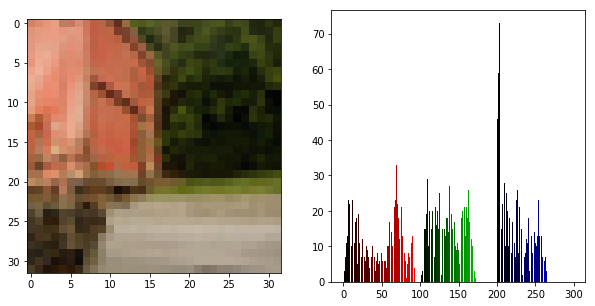

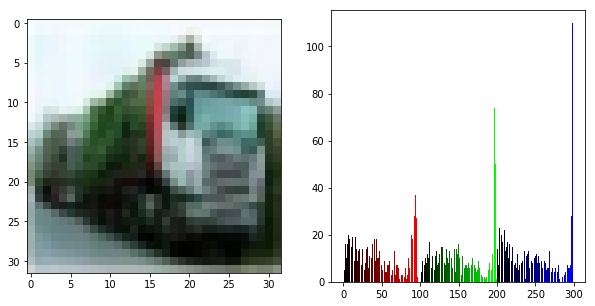

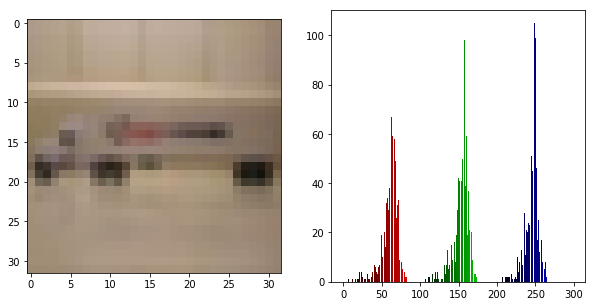

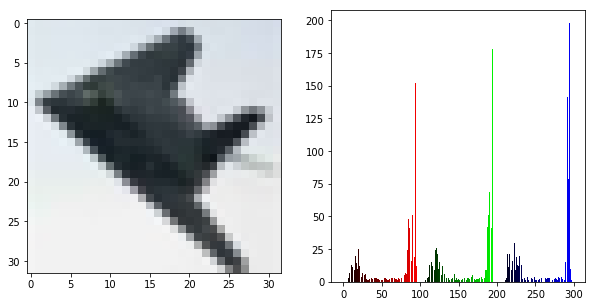

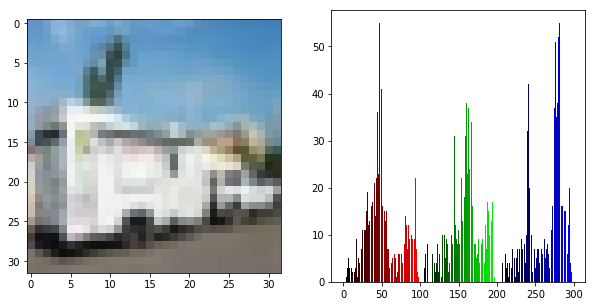

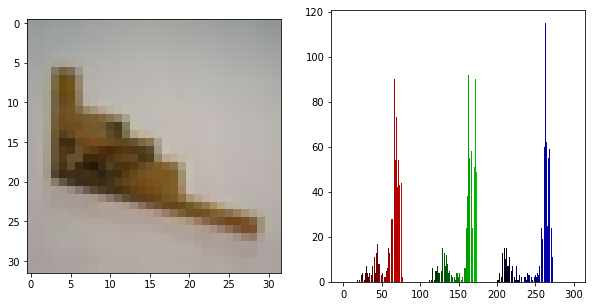

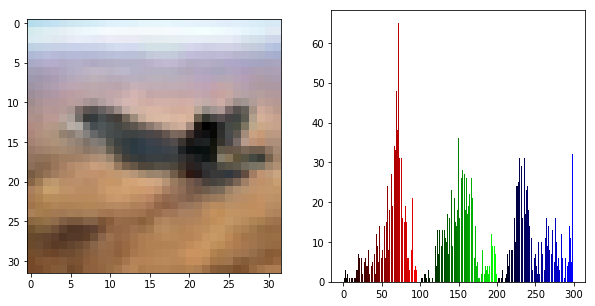

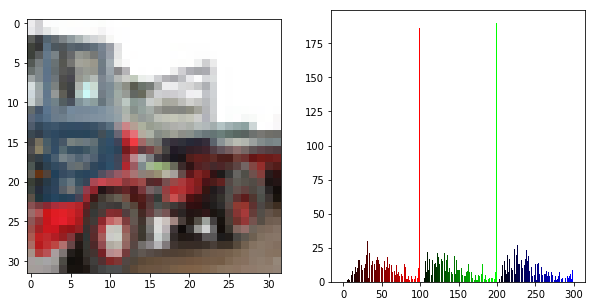

In [13]:
def extract_some_histograms(bins, use_hsv):
    C = create_colors(bins, use_hsv)
    H = [] # list used to gather histograms for every image.
    for img in data_sample:
        h = None
        ## YOUR CODE HERE
        h = image_to_histogram(img, bins, use_hsv)
        H.append(h)
        ## END YOUR CODE
        show_img_and_hist(img, h, C)

    H = np.row_stack(H) # all the histograms are "stacked" together to form a matrix.
    return H

H = extract_some_histograms(bins=100, use_hsv=False)

When you feel like you have a pretty good idea of what color histograms can tell us about each image, run the next block. It will extract histograms for ** all ** the **Trucks** and **Planes** images in our dataset and store it in the variable "H".

**Warning**: From here on out, if you want to experiment with different values for **bins** and **use_hsv**, you'll need to go back, change this code, and rerun it to get a new "H".

In [14]:
BINS = 10
USE_HSV = True
H = extract_all_histograms(bins=BINS, use_hsv=USE_HSV)
labels = load_labels()

Extracted 500 of 5978 histograms
Extracted 1000 of 5978 histograms
Extracted 1500 of 5978 histograms
Extracted 2000 of 5978 histograms
Extracted 2500 of 5978 histograms
Extracted 3000 of 5978 histograms
Extracted 3500 of 5978 histograms
Extracted 4000 of 5978 histograms
Extracted 4500 of 5978 histograms
Extracted 5000 of 5978 histograms
Extracted 5500 of 5978 histograms
Extracted 5978 of 5978 histograms
Done!


## A Sneak Peak at Machine Learning

Now that you've extracted features for all the images in the dataset, its time to train a machine learning model to tell the difference between images of **Trucks** and images of **Planes**. Your job is to fill in "machine_learning_experiment()" by creating a **Training** and **Testing** set out of "H" and storing them in them in the variables "H_train" and "H_test". You will also need to split up the labels in the same way.

** H_train ** is a set of histograms (corresponding to images) that the model looks at in order to learn.

** y_train** is a set of labels for each histogram in the training set. The model needs to see the labels to know when it gets answers right or wrong during learning.

** H_test ** is a set of histograms that the model is tested on after learning: It guesses which histograms in this set belong to Trucks and which belong to Planes, and we judge it based on its accuracy.

** y_test** is a set of labels for each histogram in the testing set. We need these to tell how good the model was at making guesses on data it hasn't seen before.

**Hint: ** Remember that "H" is just a matrix. All the rules for **slicing** and **concatenating** that you learned for images apply here too.

**Hint: ** You'll need to split up the labels in the same way you split the histograms, or else the right labels could get mixed up!

**Hint: ** The shape of H will be (num_train + num_test, num_features), and labels[i] will correspond to H[i, :]. You can find out the total size of the dataset by calling H.shape[0]!

In [18]:
def machine_learning_experiment(H, labels, num_train):
    H, labels = shuffle_data(H, labels)

    H_train = None
    H_test = None
    label_train = None
    label_test = None
    # YOUR CODE HERE
    H_train = H[:num_train, :]
    H_test = H[num_train:, :]
    label_train = labels[:num_train]
    label_test = labels[num_train:]
    # END YOUR CODE
    train_model_and_get_results(H_train, H_test, label_train, label_test)

machine_learning_experiment(H, labels, 5000)

training accuracy_cifar: 0.74; testing accuracy_cifar: 0.7484662576687117


What was your model's training and testing accuracy? Is one value larger than the other? If so, why?

**Try** playing with different sizes of the training and testing set, and see how the model's classification accuracy is affected. Does it make sense to have a bigger training set? Should the training and testing set be of equal size?

**Also Try** going back and extracting different "H" matrices. Does switching to HSV or adding more bins to your histograms change the result?


## Better Understanding Our Features

With good settings for **bins**, **use_hsv**, and a good split between training and testing data, your model should be able to get above **75%** test accuracy when trying to tell the difference between Trucks and Planes.

For comparison, if we randomly flipped a coin to make a classification decision, we would only get about **50%** accuracy. So our color histogram features really are **predictive**, or helpful for learning!

We can try to understand better why our features work by plotting the **Average Histogram** for the Planes class and the average histogram for the Trucks class and showing them side by side. The **Average Histogram** tells us, for every image belonging to a class (e.g., Trucks), how many pixels normally fall into each color bin. We call the average a "Summary Statistic", because it summarizes our data.

Fix the "compute_summary_statistics" function below by using the command ** np.mean() ** to find average histograms for class "0" and class "1", and store them to the variables "average_0" and "average_1".

** Hint: ** Just like np.concatenate(), np.mean() accepts an axis argument. What do you think it that does here?

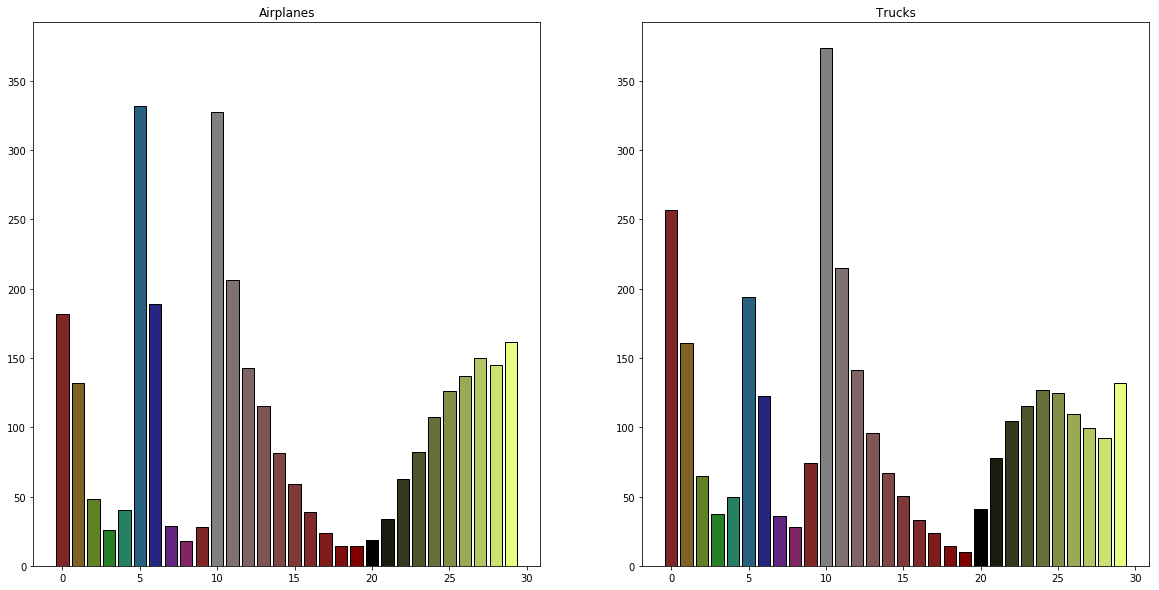

In [22]:
def compute_summary_statistics(H, labels, use_satellite= False):
    H_0 = H[labels == 0]
    H_1 = H[labels == 1]
    
    average_0 = None
    average_1 = None
    
    ## YOUR CODE HERE
    average_0 = np.mean(H_0, axis=0)
    average_1 = np.mean(H_1, axis=0)
    ## END YOUR CODE
    
    # Display the different mean vectors
    compare_hists(average_0, average_1, BINS, USE_HSV, use_satellite)
    
compute_summary_statistics(H, labels)

What can the average histograms tell us about the Trucks and Planes classes? Do you see any interesting differences between the two averages? How might this contribute to classification accuracy?

## Applying Your Machine Learning Pipeline to Satellite Imagery

You now have a complete machine learning **Pipeline**, this is a term programmers use to describe a step-by-step system that takes in data at one end and gives you a result you care about at the other end. Our pipeline consists of (1) Extracting features for a set of images (2) Separating features into training and testing sets (3) training a model on our data, and (4) computing the model accuracy.

Now that we know everything works, its time we apply our pipeline to the problem we really care about: **Predicting Poverty**

Run the pipeline in the code below on the satellite dataset, and see what type of accuracy you get:

In [24]:
BINS = 10
USE_HSV = True
H = extract_all_histograms(bins=BINS, use_hsv=USE_HSV, use_satellite=True)
labels = load_labels(use_satellite=True)

machine_learning_experiment(H, labels, 200)

Extracted 272 of 272 histograms
Done!
training accuracy_cifar: 0.69; testing accuracy_cifar: 0.5416666666666666


Yikes! It looks like our color histogram features are only working at the level of chance on the satellite dataset. Finally, lets compute summary statistics for the satellite images, and try to think about how these features worked so well for telling the difference between trucks and planes, but broke down on the satellite imagery:

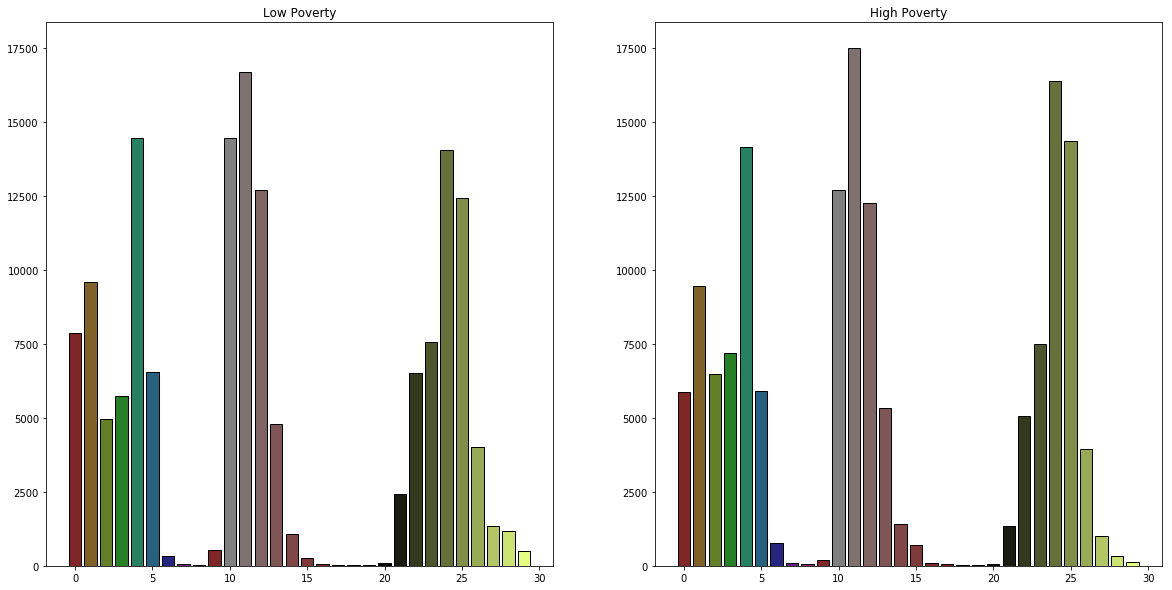

In [25]:
compute_summary_statistics(H, labels, use_satellite=True)